In [269]:
import re
import tensorflow as tf
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
import keras.datasets
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, Dense, SimpleRNN
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [228]:
vocabulary_size = 50000 #la cantidad de palabras que va a manejar la red
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [229]:
print('---review---')
print(X_test[2]) #esto es el comentario 435, con todas sus palabras intercambiadas por su número del vocabulary size
print('---label---')
print(y_test[2])#0 negativa, 1 positiv

---review---
[1, 111, 748, 4368, 1133, 33782, 24563, 4, 87, 1551, 1262, 7, 31, 318, 9459, 7, 4, 498, 5076, 748, 63, 29, 5161, 220, 686, 10941, 5, 17, 12, 575, 220, 2507, 17, 6, 185, 132, 24563, 16, 53, 928, 11, 2, 74, 4, 438, 21, 27, 10044, 589, 8, 22, 107, 20123, 19550, 997, 1638, 8, 35, 2076, 9019, 11, 22, 231, 54, 29, 1706, 29, 100, 18995, 2425, 34, 12998, 8738, 48078, 5, 19353, 98, 31, 2122, 33, 6, 58, 14, 3808, 1638, 8, 4, 365, 7, 2789, 3761, 356, 346, 4, 27608, 1060, 63, 29, 93, 11, 5421, 11, 15236, 33, 6, 58, 54, 1270, 431, 748, 7, 32, 2580, 16, 11, 94, 19469, 10, 10, 4, 993, 45222, 7, 4, 1766, 2634, 2164, 24563, 8, 847, 8, 1450, 121, 31, 7, 27, 86, 2663, 10760, 16, 6, 465, 993, 2006, 30995, 573, 17, 2, 42, 4, 17345, 37, 473, 6, 711, 6, 8869, 7, 328, 212, 70, 30, 258, 11, 220, 32, 7, 108, 21, 133, 12, 9, 55, 465, 849, 3711, 53, 33, 2071, 1969, 37, 70, 1144, 4, 5940, 1409, 74, 476, 37, 62, 91, 1329, 169, 4, 1330, 10104, 146, 655, 2212, 5, 258, 12, 184, 10104, 546, 5, 849, 10333, 

In [230]:
word2id = imdb.get_word_index()
word2id = id2word = {i: word for i, word in word2id.items()}
print([id2word.get(i) for i in X_test[98]])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [231]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_test[2]])
print('---label---')
print(y_train[435])

---review with words---
['the', 'plot', 'near', 'ears', 'recent', 'halliburton', 'cosmopolitan', 'of', 'him', 'flicks', 'frank', 'br', 'by', 'excellent', 'sans', 'br', 'of', 'past', 'loyalty', 'near', 'really', 'all', 'grief', 'family', 'four', "victim's", 'to', 'movie', 'that', 'obvious', 'family', 'brave', 'movie', 'is', 'got', 'say', 'cosmopolitan', 'with', 'up', 'comment', 'this', 'and', 'been', 'of', 'entertaining', 'not', 'be', 'lamarr', 'james', 'in', 'you', 'seen', 'vittorio', "castle's", 'portrayed', 'dirty', 'in', 'so', 'washington', 'ursula', 'this', 'you', 'minutes', 'no', 'all', 'station', 'all', 'after', 'torments', 'promising', 'who', 'aragorn', 'horn', "noir'", 'to', 'contracted', 'any', 'by', 'speed', 'they', 'is', 'my', 'as', 'screams', 'dirty', 'in', 'of', 'full', 'br', 'pacino', 'dignity', 'need', 'men', 'of', 'pitchfork', 'popular', 'really', 'all', 'way', 'this', 'behaviour', 'this', 'sturdy', 'they', 'is', 'my', 'no', 'standard', 'certainly', 'near', 'br', 'an', 

In [232]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [233]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [235]:
max_words = 50
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
#limitamos las resenas a tener como mucho 500 palabras
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [236]:
embedding_size=12
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 12)            600000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1440      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 601473 (2.29 MB)
Trainable params: 601473 (2.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [237]:
#ajustes de la red
model.compile(loss='BinaryCrossentropy',
optimizer='ADAM',
metrics=['accuracy'])

In [238]:
#ajustes del entrenamiento
batch_size = 64
num_epochs = 2
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid),
batch_size=batch_size, epochs=num_epochs)

Epoch 1/2
390/390 [==============================] - 19s 41ms/step - loss: 0.5334 - accuracy: 0.7163 - val_loss: 0.3373 - val_accuracy: 0.8750
Epoch 2/2
390/390 [==============================] - 15s 40ms/step - loss: 0.3045 - accuracy: 0.8762 - val_loss: 0.3050 - val_accuracy: 0.8750


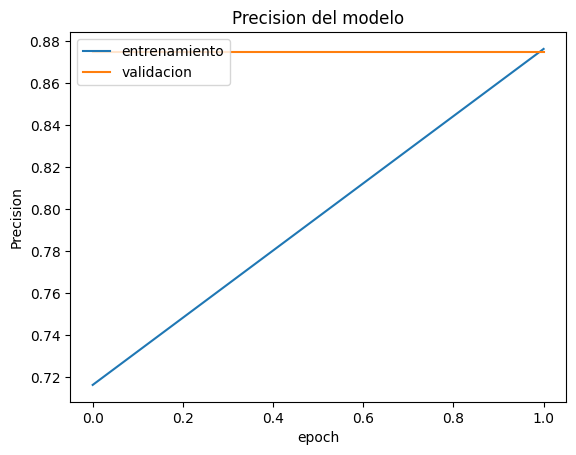

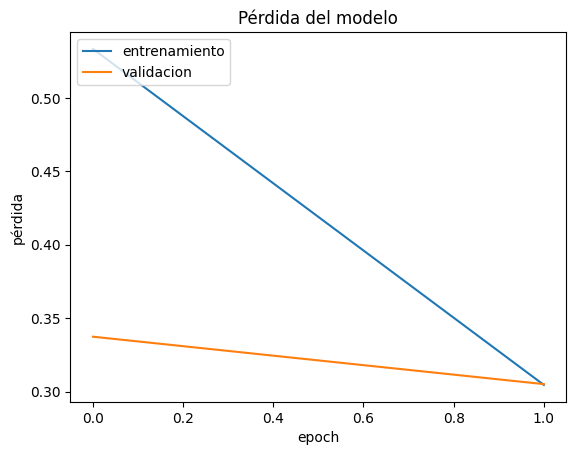

In [239]:
#Precision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()
#Perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('pérdida')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()

In [240]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8063600063323975


In [289]:
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)
word_index = keras.datasets.imdb.get_word_index()

inverted_word_index = dict(word_index.items()
)

In [287]:
sentence = "this movie was very good if you are one who likes to watch horror movies i recommend it the acting was very good although i thought that the actress playing julie could have had more emotion behind her lines allan was very good and i thought the cinematography was amazing"
sentence = sentence.split()
sentence_list = []
i = 0
while i < len(sentence):
    sentence_list.append(sentence[i].split())
    i +=1
sentence = sentence_list
i = 0
code_sentence = [[]]
while i < len(sentence):
    code_sentence[0].append(inverted_word_index[sentence[i][0]])
    i+=1
array = np.array(code_sentence)
sentence_ready = sequence.pad_sequences(array, 50)

Un valor menor que 0.5 significa que es un comentario negativo y un valor mayor a 0.5 es positivo

In [288]:
t = model(sentence_ready, training=False)
tf.print(t)

[[0.72631222]]
